In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("US_COVID19.csv")

In [8]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [9]:
df.shape

(58, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [11]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [12]:
df.head(2)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.43886
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN


In [13]:
df=df.drop(['Province_State','Country_Region','Last_Update','ISO3'],axis=1)

In [14]:
df = df.apply(pd.to_numeric)

In [15]:
df['Lat']=df.fillna(df['Lat'].mean())

In [16]:
df['Long_']=df.fillna(df['Long_'].mean())

In [17]:
df['Recovered']=df.fillna(df['Recovered'].mean())

In [18]:
df['People_Hospitalized']=df.fillna(df['People_Hospitalized'].mean())
df['Testing_Rate']=df.fillna(df['Testing_Rate'].mean())
df['Hospitalization_Rate']=df.fillna(df['Hospitalization_Rate'].mean())

In [20]:
df['Incident_Rate']=df.fillna(df['Incident_Rate'].mean())
df['People_Tested']=df.fillna(df['People_Tested'].mean())
df['Mortality_Rate']=df.fillna(df['Mortality_Rate'].mean())

In [21]:
df.isnull().sum()

Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

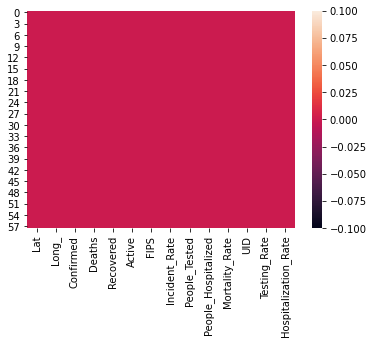

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.dtypes

Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [24]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,36.840089,26756.086207,1611.017241,36.840089,20070.724138,3288.086207,36.840089,36.840089,36.840089,36.840089,7.676194e+07,36.840089,36.840089
std,10.694329,10.694329,52562.031122,4084.750891,10.694329,41294.705318,17408.350591,10.694329,10.694329,10.694329,10.694329,2.378302e+07,10.694329,10.694329
min,-14.271000,-14.271000,0.000000,0.000000,-14.271000,0.000000,1.000000,-14.271000,-14.271000,-14.271000,-14.271000,1.600000e+01,-14.271000,-14.271000
25%,34.872800,34.872800,2596.000000,74.000000,34.872800,812.500000,18.250000,34.872800,34.872800,34.872800,34.872800,8.400001e+07,34.872800,34.872800
50%,38.978600,38.978600,10148.500000,385.000000,38.978600,5644.500000,32.500000,38.978600,38.978600,38.978600,38.978600,8.400003e+07,38.978600,38.978600
75%,42.214075,42.214075,29395.500000,1394.250000,42.214075,19291.250000,47.750000,42.214075,42.214075,42.214075,42.214075,8.400004e+07,42.214075,42.214075
max,61.370700,61.370700,354370.000000,28636.000000,61.370700,263848.000000,99999.000000,61.370700,61.370700,61.370700,61.370700,8.410000e+07,61.370700,61.370700


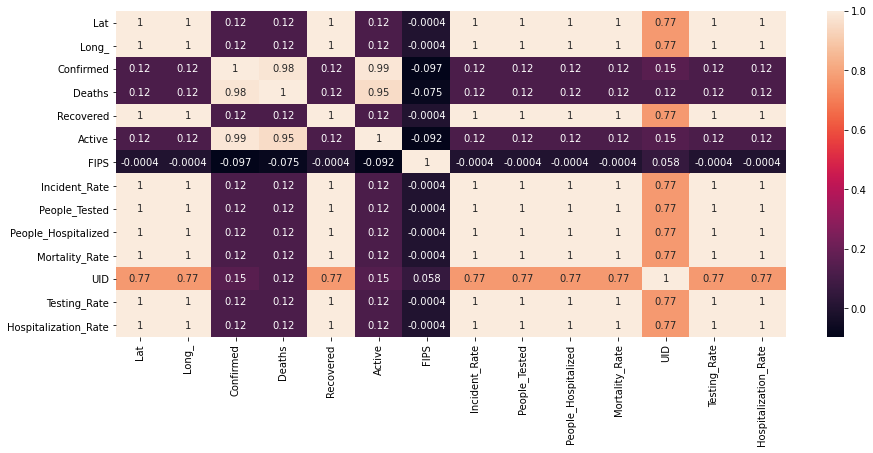

In [25]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [26]:
df.head(2)

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
0,32.3182,32.3182,13052,522,32.3182,12530.0,1,32.3182,32.3182,32.3182,32.3182,84000001,32.3182,32.3182
1,61.3707,61.3707,401,10,61.3707,39.0,2,61.3707,61.3707,61.3707,61.3707,84000002,61.3707,61.3707


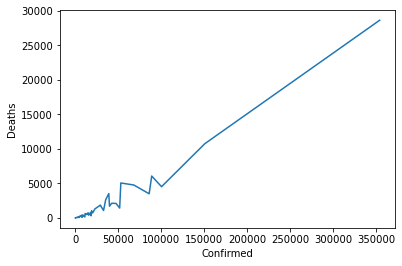

In [27]:
sns.lineplot(x='Confirmed',y='Deaths',data=df)

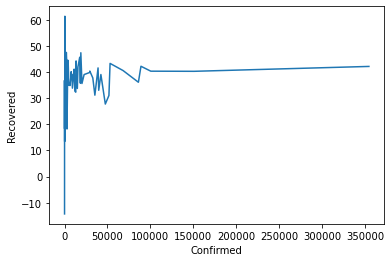

In [28]:
sns.lineplot(x='Confirmed',y='Recovered',data=df)

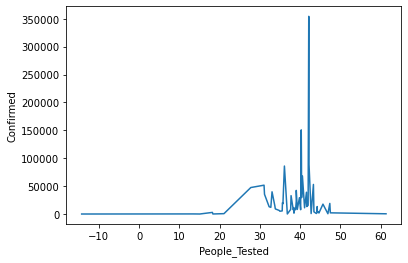

In [29]:
sns.lineplot(y='Confirmed',x='People_Tested',data=df)

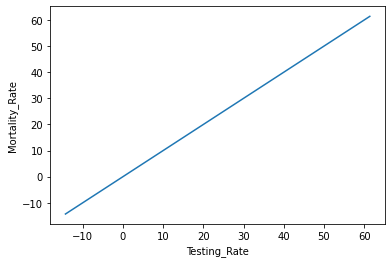

In [30]:
sns.lineplot(x='Testing_Rate',y='Mortality_Rate',data=df)

In [31]:
df.drop(['UID','Lat','Long_'],axis=1,inplace=True)

In [32]:
df.head()

,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,13052,522,32.3182,12530.0,1,32.3182,32.3182,32.3182,32.3182,32.3182,32.3182
1,401,10,61.3707,39.0,2,61.3707,61.3707,61.3707,61.3707,61.3707,61.3707
2,0,0,-14.2710,0.0,60,-14.2710,-14.2710,-14.2710,-14.2710,-14.2710,-14.2710
3,14906,747,33.7298,10386.0,4,33.7298,33.7298,33.7298,33.7298,33.7298,33.7298
4,5003,107,34.9697,1044.0,5,34.9697,34.9697,34.9697,34.9697,34.9697,34.9697


In [33]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(58, 11)
(54, 11)


In [34]:
x=df.drop('Deaths',axis=1)
y=df['Deaths']

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),SVC(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)

LinearRegression() max r2 score corresponding to  77  is  0.978755951553035
SVC() max r2 score corresponding to  62  is  0.8794950957681
DecisionTreeRegressor() max r2 score corresponding to  54  is  0.9698204733246317
RandomForestRegressor() max r2 score corresponding to  54  is  0.980646679564383
KNeighborsRegressor() max r2 score corresponding to  45  is  0.9495362077752019


In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 54,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9187167672650425
rf_accuracy: 0.92


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.64135233 0.72836168 0.72502355 0.77152344 0.26439939]


In [40]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  201.69868112277447
r2_score is:  0.9756018413105114


In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
42,144,138.98
31,138,567.82
45,538,546.90
51,54,12.50
40,1781,1908.54
